In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [6]:
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

Beginning Data Retrieval     
-----------------------------


In [12]:
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint-philippe
Processing Record 2 of Set 1 | hambantota
Processing Record 3 of Set 1 | bababe
City not found. Skipping...
Processing Record 4 of Set 1 | vilyuysk
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | kaiserslautern
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | namibe
Processing Record 9 of Set 1 | diu
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | dunedin
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | kamaishi
Processing Record 15 of Set 1 | castro
Processing Record 16 of Set 1 | kaitangata
Processing Record 17 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 18 of Set 1 | geraldton
Processing Record 19 of Set 1 | vidim
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | cape town
Processing Record 22

In [13]:
len(city_data)

572

In [14]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint-Philippe,-21.36,55.77,71.60,60,92,4.70,RE,2020-11-24 23:20:12
1,Hambantota,6.12,81.12,78.42,80,100,14.81,LK,2020-11-24 23:23:58
2,Vilyuysk,63.76,121.62,-0.78,91,100,8.93,RU,2020-11-24 23:23:58
3,Punta Arenas,-53.15,-70.92,48.20,66,75,16.11,CL,2020-11-24 23:23:13
4,Kaiserslautern,49.45,7.75,41.00,100,90,2.30,DE,2020-11-24 23:23:58
5,Hermanus,-34.42,19.23,57.00,70,41,4.00,ZA,2020-11-24 23:20:05
6,Namibe,-15.20,12.15,70.70,74,51,5.01,AO,2020-11-24 23:23:59
7,Diu,20.71,70.98,71.83,52,31,6.53,IN,2020-11-24 23:23:59
8,Mataura,-46.19,168.86,66.99,48,0,5.99,NZ,2020-11-24 23:19:53
9,Avarua,-21.21,-159.78,78.80,83,94,5.82,CK,2020-11-24 23:23:59


In [15]:
new_column_order=["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint-Philippe,RE,2020-11-24 23:20:12,-21.36,55.77,71.60,60,92,4.70
1,Hambantota,LK,2020-11-24 23:23:58,6.12,81.12,78.42,80,100,14.81
2,Vilyuysk,RU,2020-11-24 23:23:58,63.76,121.62,-0.78,91,100,8.93
3,Punta Arenas,CL,2020-11-24 23:23:13,-53.15,-70.92,48.20,66,75,16.11
4,Kaiserslautern,DE,2020-11-24 23:23:58,49.45,7.75,41.00,100,90,2.30
5,Hermanus,ZA,2020-11-24 23:20:05,-34.42,19.23,57.00,70,41,4.00
6,Namibe,AO,2020-11-24 23:23:59,-15.20,12.15,70.70,74,51,5.01
7,Diu,IN,2020-11-24 23:23:59,20.71,70.98,71.83,52,31,6.53
8,Mataura,NZ,2020-11-24 23:19:53,-46.19,168.86,66.99,48,0,5.99
9,Avarua,CK,2020-11-24 23:23:59,-21.21,-159.78,78.80,83,94,5.82


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

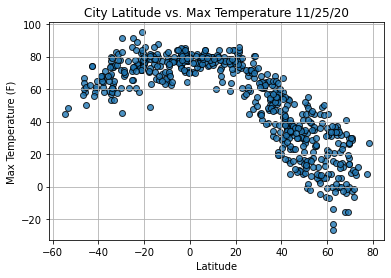

In [27]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, 
            max_temps, 
            edgecolors="black", 
            linewidths=1, marker="o",
            alpha=0.8, label="cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature {time.strftime('%x')}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig1.png")
# Show plot.
plt.show()

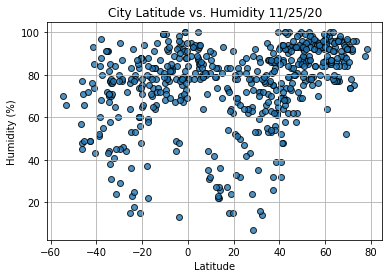

In [28]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats, 
            humidity, 
            edgecolors="black", 
            linewidths=1, marker="o",
            alpha=0.8, label="cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity {time.strftime('%x')}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

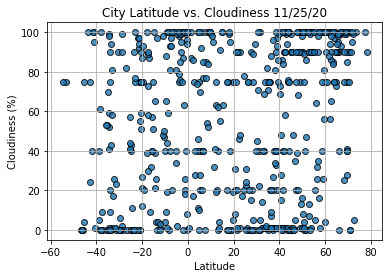

In [29]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats, 
            cloudiness, 
            edgecolors="black", 
            linewidths=1, marker="o",
            alpha=0.8, label="cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness {time.strftime('%x')}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

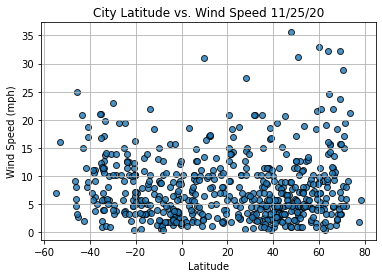

In [30]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats, 
            wind_speed, 
            edgecolors="black", 
            linewidths=1, marker="o",
            alpha=0.8, label="cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed {time.strftime('%x')}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()